# <span style=color:Blue>1.0 Dataset Merging</span>
TODO: Merge the 40 datasets into one. 20 datasets are for Minimum and Maximum temperatures each.

Merge the 20 datasets of the minimum temperatures into one, do the same for the Maximum temperatures.

Create a function to return the Minimum, Maximum, and Range of the Temperature for each stations supplied

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
#get the datasets in a list from the dataset folder
min_files=glob('dataset/*Tmin*')
max_files=glob('dataset/*Tmax*')

In [3]:
#sort the files in ascending order
min_files.sort()
max_files.sort()

In [4]:
#sample of the files
min_files[:4]

['dataset\\daily_1999_Tmin.csv',
 'dataset\\daily_2000_Tmin.csv',
 'dataset\\daily_2001_Tmin.csv',
 'dataset\\daily_2002_Tmin.csv']

In [5]:
max_files[:4]

['dataset\\daily_1999_Tmax.csv',
 'dataset\\daily_2000_Tmax.csv',
 'dataset\\daily_2001_Tmax.csv',
 'dataset\\daily_2002_Tmax.csv']

In [6]:
#check for the length of the files in the max list and assert that it's 20
len(max_files)

20

In [7]:
#check for the length of the files in the min list and assert that it's 20
len(min_files)

20

In [8]:
#check one of the files
pd.read_csv(min_files[1]).head()

,Station,lat,lon,Elevation,Town,1/1/2000,1/2/2000,1/3/2000,1/4/2000,1/5/2000,...,12/22/2000,12/23/2000,12/24/2000,12/25/2000,12/26/2000,12/27/2000,12/28/2000,12/29/2000,12/30/2000,12/31/2000
0,SU000062600,21.820,31.350,190.0,WADI,10.79,12.18,14.20,12.10,10.72,...,11.17,10.49,9.21,7.29,7.04,8.06,8.59,12.30,11.28,8.77
1,SU000062640,19.533,33.317,312.0,ABU,15.89,16.45,15.88,15.96,14.16,...,17.46,15.84,14.25,11.34,10.28,10.98,11.51,15.22,15.28,13.69
2,SU000062641,19.583,37.217,42.0,PORT,24.89,24.79,25.52,25.70,24.68,...,24.43,24.96,24.23,23.73,23.29,23.53,24.12,25.33,25.44,25.11
3,SU000062650,19.167,30.483,226.0,DONGOLA,14.54,13.05,14.57,15.30,13.24,...,15.12,14.21,12.74,10.99,7.85,8.95,10.64,12.52,12.60,12.16
4,SU000062721,15.600,32.549,380.0,KHARTOUM,18.71,17.20,16.77,16.76,16.30,...,18.30,18.56,17.86,17.65,15.92,14.52,13.98,14.73,15.76,15.92


In [9]:
#create a dataframe to assert that the stations in each of the datasets is 2077
def dataframe(df):
    df=pd.read_csv(df)
    return df.shape[0]

In [10]:
#asserting that the number of stations in each of the datasets for the minimum temperatures is 2077
for file in min_files:
    assert(dataframe(file)==2077)

In [11]:
#asserting that the number of stations in each of the datasets for the minimum temperatures is 2077
for file in max_files:
    assert(dataframe(file)==2077)

### Everything looks good, there are 2077 stations in both the mininum and maximum dataset

## Merge the datasets

In [12]:
#read the files for the minimum temperature data into a frame
min_frames=[pd.read_csv(file) for file in min_files]

#read the files for the maximum temperature data into a frame
max_frames=[pd.read_csv(file) for file in max_files]

In [13]:
#sample of one of the frames
min_frames[0]

,Station,lat,lon,Elevation,Town,1/1/1999,1/2/1999,1/3/1999,1/4/1999,1/5/1999,...,12/22/1999,12/23/1999,12/24/1999,12/25/1999,12/26/1999,12/27/1999,12/28/1999,12/29/1999,12/30/1999,12/31/1999
0,SU000062600,21.820,31.350,190.0,WADI,9.29,7.23,11.07,12.23,11.37,...,14.64,14.16,12.78,11.05,8.27,6.01,6.09,8.02,9.12,11.11
1,SU000062640,19.533,33.317,312.0,ABU,15.16,12.63,14.30,16.71,16.06,...,19.42,19.12,18.17,17.59,14.86,12.44,11.57,13.55,16.30,18.09
2,SU000062641,19.583,37.217,42.0,PORT,24.39,24.05,24.95,24.97,25.87,...,25.80,25.85,25.76,25.75,24.99,24.44,24.43,25.21,25.29,25.66
3,SU000062650,19.167,30.483,226.0,DONGOLA,13.43,11.33,11.08,13.19,13.90,...,16.66,18.15,16.40,15.06,11.83,9.23,9.62,10.87,12.78,14.69
4,SU000062721,15.600,32.549,380.0,KHARTOUM,18.40,17.63,16.43,16.67,16.45,...,18.21,17.87,17.40,17.08,17.41,15.12,17.85,18.13,17.69,17.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,EGM00062387,28.083,30.733,40.0,MINYA,8.11,8.95,8.30,8.93,6.66,...,11.15,9.00,7.06,7.37,5.42,5.27,4.01,6.04,5.86,8.50
2073,EGM00062403,26.200,32.750,96.0,SOUTH,6.72,9.80,10.48,11.23,9.13,...,13.39,10.68,10.75,9.06,7.68,5.33,5.40,8.36,8.98,12.42
2074,EGM00062423,27.050,27.983,78.0,FARAFRA,6.16,7.38,9.09,7.89,6.72,...,8.67,8.57,5.92,4.82,4.07,3.51,3.61,4.34,6.29,7.17
2075,EGM00062435,25.450,30.533,73.0,KHARGA,7.31,8.42,9.85,9.45,7.48,...,11.24,8.74,9.67,7.82,5.74,4.82,5.15,6.21,7.07,7.46


In [14]:
#drop 'Station','lat','lon','Elevation','Town' for all the frames except for the first frame before merging
#since these columns are the first 5 columns for each of the datasets, use indexing to drop them

#dropping the first 5 columns for the minimum frames
for frame in min_frames[1:]:
    frame.drop(columns=frame.columns[:5],inplace=True)

#dropping the first 5 columns for the maximum frames
for frame in max_frames[1:]:
    frame.drop(columns=frame.columns[:5],inplace=True)

In [15]:
#concatenate the frames for the minimum and maximum temperatures into one final dataset

#concatenating for minimum temperatures
df_min_temp=pd.concat(min_frames,axis=1)

#concatenating for maximum temperatures
df_max_temp=pd.concat(max_frames,axis=1)

In [16]:
df_min_temp.head()

,Station,lat,lon,Elevation,Town,1/1/1999,1/2/1999,1/3/1999,1/4/1999,1/5/1999,...,12/22/2018,12/23/2018,12/24/2018,12/25/2018,12/26/2018,12/27/2018,12/28/2018,12/29/2018,12/30/2018,12/31/2018
0,SU000062600,21.820,31.350,190.0,WADI,9.29,7.23,11.07,12.23,11.37,...,6.90,7.84,8.58,9.16,9.77,8.17,5.98,4.94,4.71,5.21
1,SU000062640,19.533,33.317,312.0,ABU,15.16,12.63,14.30,16.71,16.06,...,9.48,9.89,13.34,15.35,14.53,13.43,10.77,10.42,9.15,7.09
2,SU000062641,19.583,37.217,42.0,PORT,24.39,24.05,24.95,24.97,25.87,...,23.70,24.49,25.22,25.45,25.99,25.82,24.13,23.83,23.92,23.62
3,SU000062650,19.167,30.483,226.0,DONGOLA,13.43,11.33,11.08,13.19,13.90,...,8.13,8.21,10.44,13.13,12.25,12.41,10.28,8.23,7.73,6.70
4,SU000062721,15.600,32.549,380.0,KHARTOUM,18.40,17.63,16.43,16.67,16.45,...,13.42,13.41,13.96,16.30,17.26,17.56,15.77,13.27,13.03,12.43


In [17]:
#transpose the minimum and maximum datasets in order to set the index as the datetime
df_min_transpose=df_min_temp.T

#get the station values to set as the transpose data column
station=df_min_temp['Station']

#set the transpose data columns to the station values
df_min_transpose.columns=station

#get the min temperature values, excluding the station, lat, lon and Elevation, rename the axis to None
df_min_temp_stations=df_min_transpose.iloc[5:,:].rename_axis(None,axis=1)

#set the index of the dataset to datetime
df_min_temp_stations.index=pd.to_datetime(df_min_temp_stations.index)
df_min_temp_stations.head()

,SU000062600,SU000062640,SU000062641,SU000062650,SU000062721,SU000062730,SU000062752,SU000062760,SU000062762,SU000062770,...,EGE00147732,EGM00062305,EGM00062318,EGM00062337,EGM00062378,EGM00062387,EGM00062403,EGM00062423,EGM00062435,EGM00062476
1999-01-01,9.29,15.16,24.39,13.43,18.4,18.43,20.13,13.3,20.69,13.61,...,11.98,8.72,12.79,13.54,10.47,8.11,6.72,6.16,7.31,18.1
1999-01-02,7.23,12.63,24.05,11.33,17.63,18.51,20.2,12.96,20.81,12.23,...,10.06,7.75,11.77,11.89,9.38,8.95,9.8,7.38,8.42,17.85
1999-01-03,11.07,14.3,24.95,11.08,16.43,18.13,20.84,12.61,20.67,12.45,...,9.35,7.78,11.02,9.46,8.3,8.3,10.48,9.09,9.85,20.09
1999-01-04,12.23,16.71,24.97,13.19,16.67,18.09,21.53,12.33,19.63,11.91,...,7.85,7.4,10.74,10.39,7.26,8.93,11.23,7.89,9.45,19.54
1999-01-05,11.37,16.06,25.87,13.9,16.45,18.21,21.77,12.64,20.2,12.24,...,9.06,7.77,8.86,11.9,7.57,6.66,9.13,6.72,7.48,21.08


In [18]:
df_min_temp_stations.shape

(7305, 2077)

In [19]:
#do the same for maximum temperature for the stations
df_max_transpose=df_max_temp.T
station=df_max_temp['Station']
df_max_transpose.columns=station
df_max_temp_stations=df_max_transpose.iloc[5:,:].rename_axis(None,axis=1)
df_max_temp_stations.index=pd.to_datetime(df_max_temp_stations.index)
df_max_temp_stations.head()

,SU000062600,SU000062640,SU000062641,SU000062650,SU000062721,SU000062730,SU000062752,SU000062760,SU000062762,SU000062770,...,EGE00147732,EGM00062305,EGM00062318,EGM00062337,EGM00062378,EGM00062387,EGM00062403,EGM00062423,EGM00062435,EGM00062476
1999-01-01,23.33,29.89,27.07,29.91,33.67,35.12,30.01,30.19,34.66,31.95,...,19.6,14.87,19.21,18.5,20.75,21.06,23.29,19.38,20.08,25.52
1999-01-02,23.97,29.33,26.4,28.45,32.92,34.91,30.42,30.48,35.06,32.11,...,21.04,17.93,20.64,20.65,21.58,20.48,26.44,20.12,23.71,26.96
1999-01-03,26.18,30.32,27.51,30.28,33.42,35.03,30.2,30.6,34.03,31.53,...,22.81,18.88,22.23,21.18,21.74,19.3,26.94,19.88,24.36,26.69
1999-01-04,27.69,31.33,27.71,30.44,33.92,36.69,30.73,30.92,34.97,31.25,...,20.33,16.44,20.42,20.36,20.3,16.75,26.28,18.1,23.12,27.74
1999-01-05,23.12,31.25,28.47,27.33,33.26,36.79,31.09,29.78,35.14,30.25,...,18.9,16.6,18.65,17.8,18.79,18.43,21.48,17.8,19.04,28.66


In [20]:
df_max_temp_stations.shape

(7305, 2077)

In [21]:
df_max_temp_stations.head()

,SU000062600,SU000062640,SU000062641,SU000062650,SU000062721,SU000062730,SU000062752,SU000062760,SU000062762,SU000062770,...,EGE00147732,EGM00062305,EGM00062318,EGM00062337,EGM00062378,EGM00062387,EGM00062403,EGM00062423,EGM00062435,EGM00062476
1999-01-01,23.33,29.89,27.07,29.91,33.67,35.12,30.01,30.19,34.66,31.95,...,19.6,14.87,19.21,18.5,20.75,21.06,23.29,19.38,20.08,25.52
1999-01-02,23.97,29.33,26.4,28.45,32.92,34.91,30.42,30.48,35.06,32.11,...,21.04,17.93,20.64,20.65,21.58,20.48,26.44,20.12,23.71,26.96
1999-01-03,26.18,30.32,27.51,30.28,33.42,35.03,30.2,30.6,34.03,31.53,...,22.81,18.88,22.23,21.18,21.74,19.3,26.94,19.88,24.36,26.69
1999-01-04,27.69,31.33,27.71,30.44,33.92,36.69,30.73,30.92,34.97,31.25,...,20.33,16.44,20.42,20.36,20.3,16.75,26.28,18.1,23.12,27.74
1999-01-05,23.12,31.25,28.47,27.33,33.26,36.79,31.09,29.78,35.14,30.25,...,18.9,16.6,18.65,17.8,18.79,18.43,21.48,17.8,19.04,28.66


In [22]:
df_min_temp_stations.head()

,SU000062600,SU000062640,SU000062641,SU000062650,SU000062721,SU000062730,SU000062752,SU000062760,SU000062762,SU000062770,...,EGE00147732,EGM00062305,EGM00062318,EGM00062337,EGM00062378,EGM00062387,EGM00062403,EGM00062423,EGM00062435,EGM00062476
1999-01-01,9.29,15.16,24.39,13.43,18.4,18.43,20.13,13.3,20.69,13.61,...,11.98,8.72,12.79,13.54,10.47,8.11,6.72,6.16,7.31,18.1
1999-01-02,7.23,12.63,24.05,11.33,17.63,18.51,20.2,12.96,20.81,12.23,...,10.06,7.75,11.77,11.89,9.38,8.95,9.8,7.38,8.42,17.85
1999-01-03,11.07,14.3,24.95,11.08,16.43,18.13,20.84,12.61,20.67,12.45,...,9.35,7.78,11.02,9.46,8.3,8.3,10.48,9.09,9.85,20.09
1999-01-04,12.23,16.71,24.97,13.19,16.67,18.09,21.53,12.33,19.63,11.91,...,7.85,7.4,10.74,10.39,7.26,8.93,11.23,7.89,9.45,19.54
1999-01-05,11.37,16.06,25.87,13.9,16.45,18.21,21.77,12.64,20.2,12.24,...,9.06,7.77,8.86,11.9,7.57,6.66,9.13,6.72,7.48,21.08


In [25]:
#create a function that takes the station as input and returns the maximum temperature, minimum temparature and 
#temperature range for each station in a dataframe
def station_df(station):
    minimum_temp=df_min_temp_stations[station]
    maximum_temp=df_max_temp_stations[station]
    df=pd.DataFrame(maximum_temp).rename(columns={station:f'{station}_max'})
    df[f'{station}_min']=minimum_temp
    df['Temp_range']=df[f'{station}_max'] - df[f'{station}_min']
    return (df)

In [26]:
#create the list of the stations to supply as input
stations=df_min_temp_stations.columns

In [27]:
#sample oubtput
station_df(stations[0])

,SU000062600_max,SU000062600_min,Temp_range
1999-01-01,23.33,9.29,14.04
1999-01-02,23.97,7.23,16.74
1999-01-03,26.18,11.07,15.11
1999-01-04,27.69,12.23,15.46
1999-01-05,23.12,11.37,11.75
...,...,...,...
2018-12-27,21.37,8.17,13.2
2018-12-28,17.8,5.98,11.82
2018-12-29,17.83,4.94,12.89
2018-12-30,18.52,4.71,13.81


# <span style=color:Blue>2.0 Data Analysis</span>

#### For the data analysis the dataset for it will just be prepared now
#### Index = datetime
#### Cols = Latitiude (LAT), Longitude (LON), Elevation, Tmin, Tmax, Taverage, Trange 

In [28]:
#create an empty daframe
df_analyze = pd.DataFrame()
#place datetime column and index of this new dataframe
df_analyze = df_analyze.assign(datetime=df_min_temp_stations.index).set_index('datetime')

In [29]:
df_analyze.head()

""
datetime
1999-01-01
1999-01-02
1999-01-03
1999-01-04
1999-01-05


In [30]:
df_analyze.shape

(7305, 0)

#### The following codes will be used in creating four dataset having datetime as the index, hence its a time series dataset

#### So they have the date columns as index already, Latitude and Longitude will then be added as a dataframe

In [32]:
#make station as column headers in df_analyze
for station in stations:
    df_analyze[station]=station_df(station)['Temp_range']

In [33]:
df_analyze.head()

,SU000062600,SU000062640,SU000062641,SU000062650,SU000062721,SU000062730,SU000062752,SU000062760,SU000062762,SU000062770,...,EGE00147732,EGM00062305,EGM00062318,EGM00062337,EGM00062378,EGM00062387,EGM00062403,EGM00062423,EGM00062435,EGM00062476
datetime,,,,,,,,,,,,,,,,,,,,,
1999-01-01,14.04,14.73,2.68,16.48,15.27,16.69,9.88,16.89,13.97,18.34,...,7.62,6.15,6.42,4.96,10.28,12.95,16.57,13.22,12.77,7.42
1999-01-02,16.74,16.7,2.35,17.12,15.29,16.4,10.22,17.52,14.25,19.88,...,10.98,10.18,8.87,8.76,12.2,11.53,16.64,12.74,15.29,9.11
1999-01-03,15.11,16.02,2.56,19.2,16.99,16.9,9.36,17.99,13.36,19.08,...,13.46,11.1,11.21,11.72,13.44,11.0,16.46,10.79,14.51,6.6
1999-01-04,15.46,14.62,2.74,17.25,17.25,18.6,9.2,18.59,15.34,19.34,...,12.48,9.04,9.68,9.97,13.04,7.82,15.05,10.21,13.67,8.2
1999-01-05,11.75,15.19,2.6,13.43,16.81,18.58,9.32,17.14,14.94,18.01,...,9.84,8.83,9.79,5.9,11.22,11.77,12.35,11.08,11.56,7.58


In [34]:
df_date_station_Temp_range=df_analyze.copy()

In [35]:
#make station as column headers in df_analyze with values as the minimum temperature
for station in stations:
    df_analyze[station]=station_df(station)[f'{station}_min']

In [36]:
df_date_station_Temp_Min=df_analyze.copy()

In [37]:
#make station as column headers in df_analyze with values as the maximum temperature
for station in stations:
    df_analyze[station]=station_df(station)[f'{station}_max']
df_date_station_Temp_Max=df_analyze.copy()

In [38]:
#make station as column headers in df analyze with values as the average temperature of the maximum 
#and minimum temperatures
for station in stations:
    df_analyze[station]=station_df(station)[[f'{station}_max',f'{station}_min']].mean(axis=1)
df_date_station_Temp_Avg=df_analyze.copy()

#### A dataset of index = StationId is also needed for the geospatial analysis and analysis based on zones 

In [39]:
#get the station metadata, which are the first 5 columns, [Station, Lat, Lon, Elevation, Town]
station_metadata=df_min_temp[['Station','lat','lon','Elevation']]

#create an empty dataframe to hold the station, lat, lon and elevation
df=pd.DataFrame()
#place the station, lat, lon and elevation in the dataframe
df=df.assign(station=station_metadata['Station']).set_index('station')
df['latitude']=station_metadata['lat'].values
df['longitude']=station_metadata['lon'].values
df['elevation']=station_metadata['Elevation'].values

#find the mean minimum of the temperatures for each station
df['Temp_mean_min']=df_date_station_Temp_Min.mean(axis=0)
#find the mean maximum of the temperatures for each station
df['Temp_mean_max']=df_date_station_Temp_Max.mean(axis=0)
#find the mean average of the temperatures for each station
df['Temp_mean_avg']=df_date_station_Temp_Avg.mean(axis=0)
#find the mean range of the temperatures for each station
df['Temp_mean_range']=df_date_station_Temp_range.mean(axis=0)
#check the dataframe
df.head()

,latitude,longitude,elevation,Temp_mean_min,Temp_mean_max,Temp_mean_avg,Temp_mean_range
station,,,,,,,
SU000062600,21.820,31.350,190.0,18.154073,33.736203,25.945138,15.58213
SU000062640,19.533,33.317,312.0,20.698164,36.853903,28.776034,16.155739
SU000062641,19.583,37.217,42.0,27.370324,31.01263,29.191477,3.642305
SU000062650,19.167,30.483,226.0,20.289875,37.042861,28.666368,16.752986
SU000062721,15.600,32.549,380.0,21.724764,37.58137,29.653067,15.856606


In [40]:
#save the dataframe in a csv file
df.to_csv('df_geo_space.csv',index=False)

# Q1: Build a scatter mapbox showing the mean temperature for the stations in Africa

In [ ]:
import plotly.express as px
df=pd.read_csv('df_geo_space.csv')
px.scatter_mapbox(
    data_frame=df,
    lat='latitude',
    lon='longitude',
    color='Temp_mean_avg',
    color_continuous_scale=['Green','Red'],
    mapbox_style='open-street-map'
)

## The scatter mapbox shows that the mean temperature for the stations in Africa varies widely, from  4.39 degrees off the coast of Indian Oceean near Madagascar to 37.89 degrees Celsius in a Sudan. Overall, The warmest temperatures are found in Sudan, Guinea and the Horn of Africa. The coolest temperatures are found in the  South Africa, Lesotho and the Ethiopian Highlands.

## The map also shows that there is a general trend of decreasing temperature from north to south in Africa. This is because the northern part of the continent is closer to the equator, where the sun's rays are more direct and the temperatures are higher. The southern part of the continent is closer to the poles, where the sun's rays are less direct and the temperatures are lower.

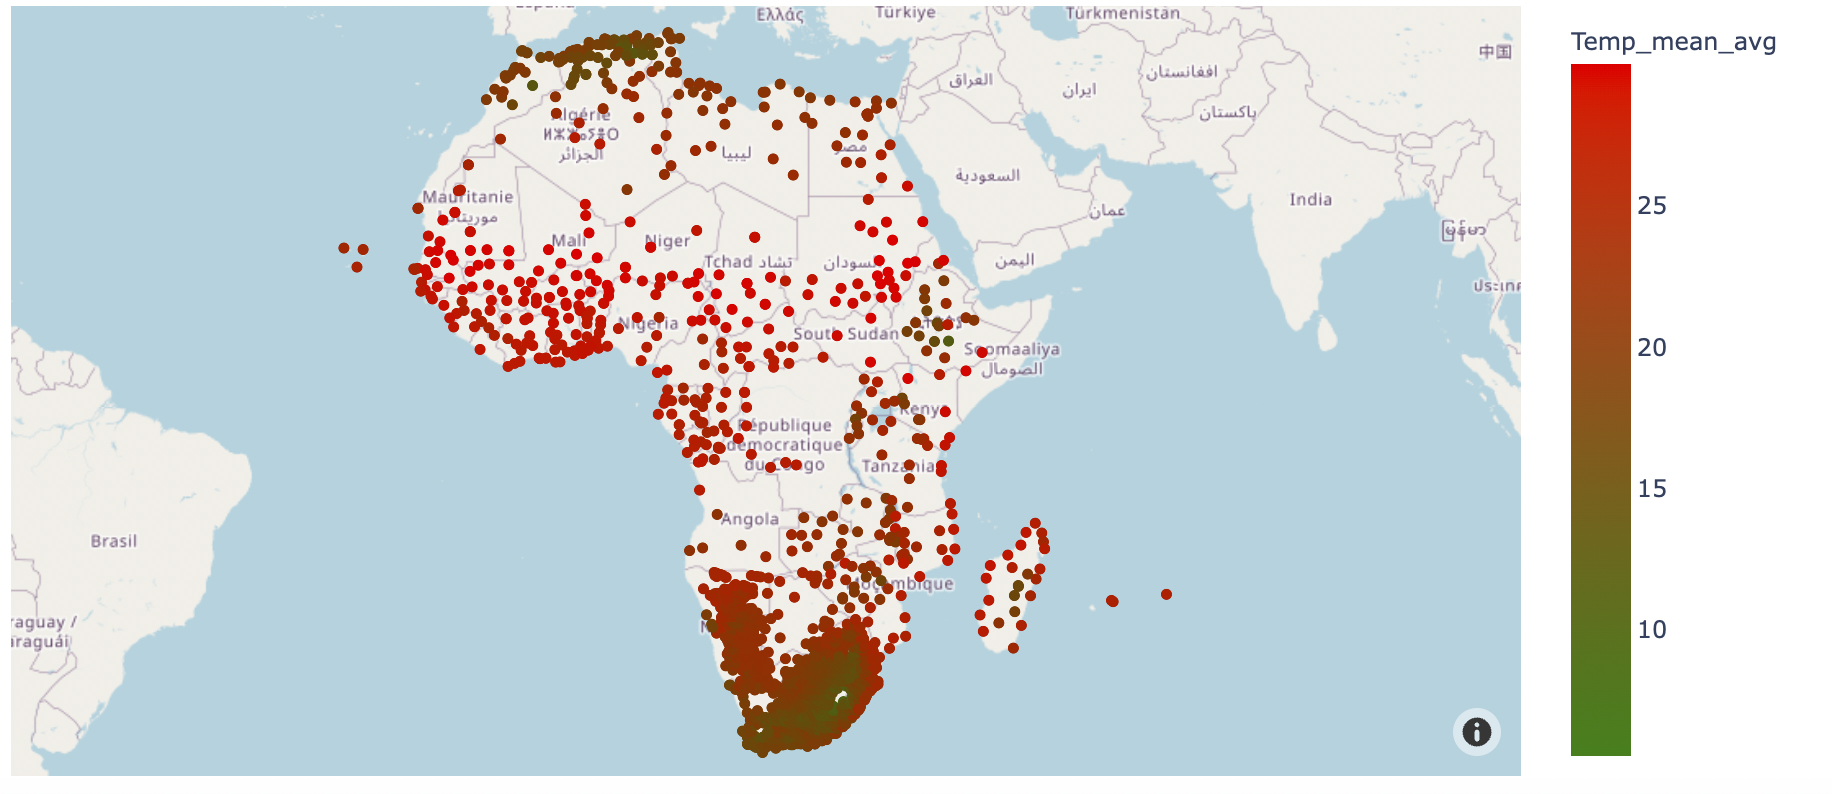

## From the map, we observe that the temperature mean temperature is extreme towards the equator and lower towards the poles.

# Q2. check the mean  temperature trends across the years

In [47]:
#import data with the average temperature and also parse datetime column
#Note, the dataset to be imported is the df_date_station_Temp_Avg
#df_avg=pd.read_csv("df_date_station_Temp_Avg.csv", parse_dates=["datetime"])
df_avg = df_date_station_Temp_Avg
#df_avg=pd.read_csv("df_date_station_Temp_Avg.csv", parse_dates=["datetime"])
df_avg.head()

,SU000062600,SU000062640,SU000062641,SU000062650,SU000062721,SU000062730,SU000062752,SU000062760,SU000062762,SU000062770,...,EGE00147732,EGM00062305,EGM00062318,EGM00062337,EGM00062378,EGM00062387,EGM00062403,EGM00062423,EGM00062435,EGM00062476
datetime,,,,,,,,,,,,,,,,,,,,,
1999-01-01,16.31,22.525,25.73,21.67,26.035,26.775,25.07,21.745,27.675,22.78,...,15.79,11.795,16.0,16.02,15.61,14.585,15.005,12.77,13.695,21.81
1999-01-02,15.6,20.98,25.225,19.89,25.275,26.71,25.31,21.72,27.935,22.17,...,15.55,12.84,16.205,16.27,15.48,14.715,18.12,13.75,16.065,22.405
1999-01-03,18.625,22.31,26.23,20.68,24.925,26.58,25.52,21.605,27.35,21.99,...,16.08,13.33,16.625,15.32,15.02,13.8,18.71,14.485,17.105,23.39
1999-01-04,19.96,24.02,26.34,21.815,25.295,27.39,26.13,21.625,27.3,21.58,...,14.09,11.92,15.58,15.375,13.78,12.84,18.755,12.995,16.285,23.64
1999-01-05,17.245,23.655,27.17,20.615,24.855,27.5,26.43,21.21,27.67,21.245,...,13.98,12.185,13.755,14.85,13.18,12.545,15.305,12.26,13.26,24.87


In [48]:
df = df_date_station_Temp_Avg.copy()
df.head()

,SU000062600,SU000062640,SU000062641,SU000062650,SU000062721,SU000062730,SU000062752,SU000062760,SU000062762,SU000062770,...,EGE00147732,EGM00062305,EGM00062318,EGM00062337,EGM00062378,EGM00062387,EGM00062403,EGM00062423,EGM00062435,EGM00062476
datetime,,,,,,,,,,,,,,,,,,,,,
1999-01-01,16.31,22.525,25.73,21.67,26.035,26.775,25.07,21.745,27.675,22.78,...,15.79,11.795,16.0,16.02,15.61,14.585,15.005,12.77,13.695,21.81
1999-01-02,15.6,20.98,25.225,19.89,25.275,26.71,25.31,21.72,27.935,22.17,...,15.55,12.84,16.205,16.27,15.48,14.715,18.12,13.75,16.065,22.405
1999-01-03,18.625,22.31,26.23,20.68,24.925,26.58,25.52,21.605,27.35,21.99,...,16.08,13.33,16.625,15.32,15.02,13.8,18.71,14.485,17.105,23.39
1999-01-04,19.96,24.02,26.34,21.815,25.295,27.39,26.13,21.625,27.3,21.58,...,14.09,11.92,15.58,15.375,13.78,12.84,18.755,12.995,16.285,23.64
1999-01-05,17.245,23.655,27.17,20.615,24.855,27.5,26.43,21.21,27.67,21.245,...,13.98,12.185,13.755,14.85,13.18,12.545,15.305,12.26,13.26,24.87


In [ ]:
# add new columns
df_avg["year"]=df_avg["datetime"].dt.year
df_avg["avg_temp"]=df_avg.iloc[:,1:2079].mean(axis=1)

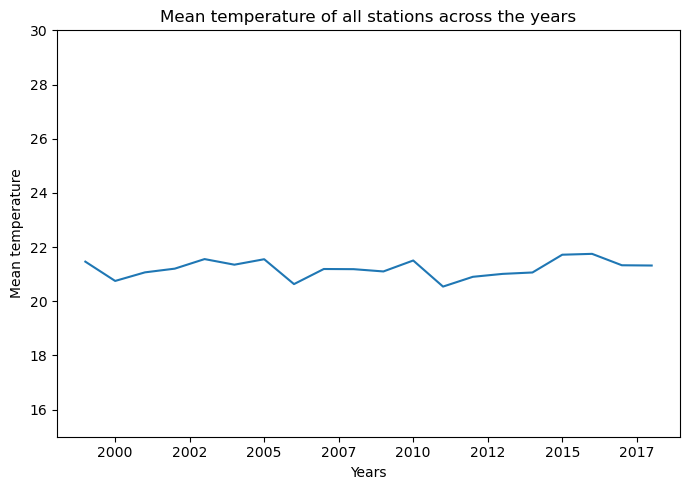

In [ ]:
# Visual representation of the mean temperature of all station across all years 
fig, ax = plt.subplots(figsize=(7,5))  # Adjust the figsize as needed
df_avg.groupby("year")["avg_temp"].mean().plot(ax=ax)
ax.set_title("Mean temperature of all stations across the years")
ax.set_ylabel("Mean temperature")
ax.set_xlabel("Years")
ax.set_ylim(15, 30)  # Set the y-axis limits, with a maximum value of 30

# Format the x-axis tick labels to remove decimal places
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.tight_layout()  # Center the plot
plt.show()